In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing

df_yield = pd.read_csv("yield.csv")
df_temp= pd.read_csv("temp.csv")
df_rainfall = pd.read_csv("rainfall.csv")
df_pesticides = pd.read_csv("pesticides.csv")
df_yield_df = pd.read_csv("yield_df.csv")

print("Info for df_yield:")
print(df_yield.info())

print("Info for df_temp:")
print(df_temp.info())

print("Info for df_rainfall:")
print(df_rainfall.info())

print("Info for df_pesticides:")
print(df_pesticides.info())

print("Info for df_yield_df:")
print(df_yield_df.info())

Info for df_yield:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56717 entries, 0 to 56716
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Domain Code   56717 non-null  object
 1   Domain        56717 non-null  object
 2   Area Code     56717 non-null  int64 
 3   Area          56717 non-null  object
 4   Element Code  56717 non-null  int64 
 5   Element       56717 non-null  object
 6   Item Code     56717 non-null  int64 
 7   Item          56717 non-null  object
 8   Year Code     56717 non-null  int64 
 9   Year          56717 non-null  int64 
 10  Unit          56717 non-null  object
 11  Value         56717 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 5.2+ MB
None
Info for df_temp:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      71311 non-

In [2]:
#now find columns for joining

print(df_yield.columns)
print(df_yield['Area'].nunique())
print(df_yield['Year'].nunique())

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')
212
56


In [3]:
print(df_yield_df.columns)
print(df_yield_df['Area'].nunique())
print(df_yield_df['Year'].nunique())
df_yield_df.drop(['Unnamed: 0'], axis = 1 ,inplace = True)

Index(['Unnamed: 0', 'Area', 'Item', 'Year', 'hg/ha_yield',
       'average_rain_fall_mm_per_year', 'pesticides_tonnes', 'avg_temp'],
      dtype='object')
101
23


In [4]:
print(df_pesticides.columns)
print(df_pesticides['Area'].nunique())
print(df_pesticides['Year'].nunique())

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')
168
27


In [5]:
print(df_rainfall.columns)
## Renaming the ' Area' column
df_rainfall.rename(columns = {' Area':'Area'},inplace = True)
print(df_rainfall['Area'].nunique())
print(df_rainfall['Year'].nunique())

Index([' Area', 'Year', 'average_rain_fall_mm_per_year'], dtype='object')
217
31


In [6]:
print(df_temp.columns)
df_temp.rename(columns = {'year':'Year','country':'Area'},inplace = True)
print(df_temp['Area'].nunique())
print(df_temp['Year'].nunique())
print(df_temp.columns)

Index(['year', 'country', 'avg_temp'], dtype='object')
137
271
Index(['Year', 'Area', 'avg_temp'], dtype='object')


In [7]:
#merge by Year and Area columns
df_temprain = pd.merge(df_rainfall,df_temp,on = ['Year','Area'])
df_trp = pd.merge(df_temprain,df_pesticides , on = ['Year','Area'])

In [8]:
trpl =list(df_trp.columns)
dfy = list(df_yield.columns)
com1 = [i for i in trpl if i in dfy]

In [9]:
print(df_yield.columns)
print(df_yield_df.columns)


ly = [i for i in list(df_yield.columns) if i in (df_yield_df.columns)]

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')
Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')


In [10]:
yield_df = pd.merge(df_yield_df,df_yield, on = ['Year','Area','Item'])

In [11]:
print(yield_df.shape)

print(yield_df.columns)
print(df_trp.columns)

(28242, 16)
Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp', 'Domain Code', 'Domain', 'Area Code',
       'Element Code', 'Element', 'Item Code', 'Year Code', 'Unit', 'Value'],
      dtype='object')
Index(['Area', 'Year', 'average_rain_fall_mm_per_year', 'avg_temp', 'Domain',
       'Element', 'Item', 'Unit', 'Value'],
      dtype='object')


In [12]:
# Assuming your first dataframe is df1 and second dataframe is df2
years_df1 = set(yield_df['Year'].unique())
years_df2 = set(df_trp['Year'].unique())

# Find the years in df2 that are not in df1
years_only_in_df2 = years_df2 - years_df1

# Print the result
print("Years present in df1 but not in df2:", years_only_in_df2)

Years present in df1 but not in df2: set()


In [13]:
# Assuming your first dataframe is df1 and second dataframe is df2
area_df1 = set(yield_df['Year'].unique())
area_df2 = set(df_trp['Year'].unique())

# Find the areas in df2 that are not in df1
area_only_in_df1 = area_df2 - area_df1

# Print the result
print("Area present in df1 but not in df2:", area_only_in_df1)

Area present in df1 but not in df2: set()


In [14]:
yield_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Domain Code,Domain,Area Code,Element Code,Element,Item Code,Year Code,Unit,Value
0,Albania,Maize,1990,36613,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,56,1990,hg/ha,36613
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,116,1990,hg/ha,66667
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,27,1990,hg/ha,23333
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,83,1990,hg/ha,12500
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37,QC,Crops,3,5419,Yield,236,1990,hg/ha,7000


In [15]:
df_trp.head()

,Area,Year,average_rain_fall_mm_per_year,avg_temp,Domain,Element,Item,Unit,Value
0,Albania,1990,1485,16.37,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0
1,Albania,1991,1485,15.36,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0
2,Albania,1992,1485,16.06,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0
3,Albania,1993,1485,16.05,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,121.0
4,Albania,1994,1485,16.96,Pesticides Use,Use,Pesticides (total),tonnes of active ingredients,201.0


In [16]:
print(yield_df['Item Code'].nunique())
print(yield_df['Item'].nunique())
## It has one unique value for each crop

10
10


In [17]:
print(yield_df['Domain'].nunique())
print(yield_df['Domain Code'].nunique())

1
1


In [18]:
print(yield_df['Area'].nunique())
print(yield_df['Area Code'].nunique())

101
101


In [19]:
print(yield_df['Element Code'].nunique())
print(yield_df['Element'].nunique())
print(yield_df['Unit'].nunique())

1
1
1


In [20]:
#it is clear that Area Code and Domain Code are duplicate
#Element, Element Code, and Unit are constants that are not in use

## Making a copy of the dataset , because it may be required for later use

Yield_final_data = yield_df.copy()

Yield_final_data.drop(['Area Code','Year Code','Domain','Domain Code','Area Code','Item Code','Element','Element Code','Unit','Value'],axis = 1 , inplace = True)

Yield_final_data.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [21]:
Yield_final_data['Item'].value_counts()

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [22]:
#rice and paddy is the same thing so renamed to Rice
#Plantains and others dropped as too wide a variety

Yield_final_data['Item'] = Yield_final_data['Item'].str.replace('Rice, paddy','Rice')
Yield_final_data = Yield_final_data[Yield_final_data['Item'] != 'Plantains and others']

Yield_final_data['Item'].value_counts()

Item
Potatoes          4276
Maize             4121
Wheat             3857
Rice              3388
Soybeans          3223
Sorghum           3039
Sweet potatoes    2890
Cassava           2045
Yams               847
Name: count, dtype: int64

In [23]:
#check if datatypes are fine
Yield_final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27686 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           27686 non-null  object 
 1   Item                           27686 non-null  object 
 2   Year                           27686 non-null  int64  
 3   hg/ha_yield                    27686 non-null  int64  
 4   average_rain_fall_mm_per_year  27686 non-null  float64
 5   pesticides_tonnes              27686 non-null  float64
 6   avg_temp                       27686 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.7+ MB


In [24]:
Yield_final_data.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,27686.000000,27686.000000,27686.000000,27686.000000,27686.000000
mean,2001.545041,76471.185112,1134.900491,37662.227559,20.468303
std,7.051131,85094.478221,704.475099,60365.056452,6.333762
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19594.000000,591.000000,1795.940000,16.640000
50%,2001.000000,37202.000000,1083.000000,18131.000000,21.450000
75%,2008.000000,104002.000000,1668.000000,49157.000000,25.960000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


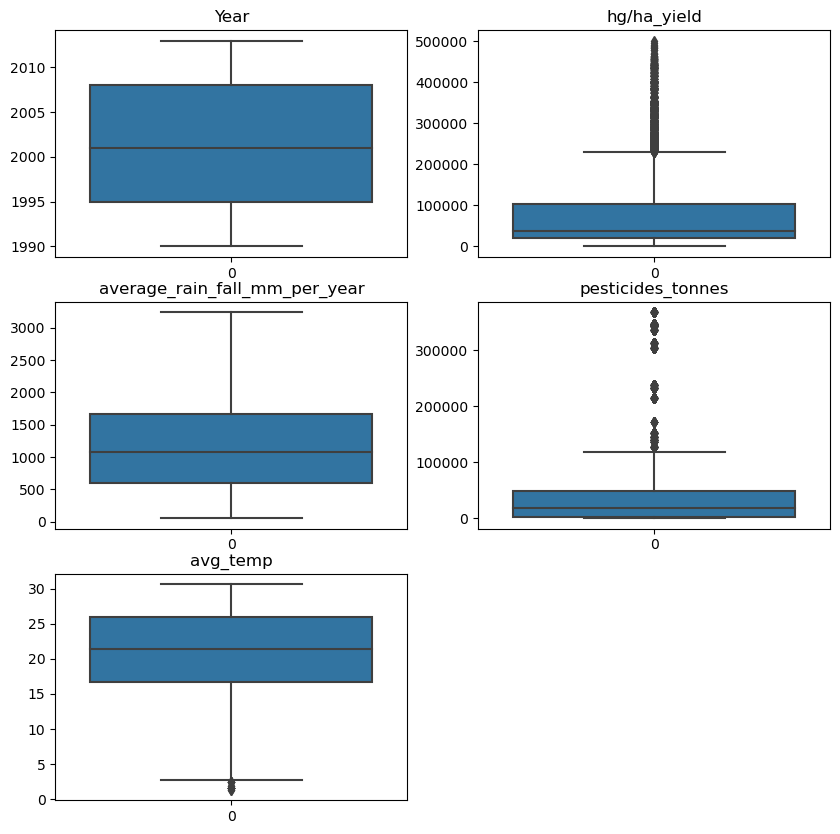

In [25]:
# Checking the data for outliers

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(data= Yield_final_data['Year'])
plt.title('Year')


plt.subplot(3,2,2)
sns.boxplot(data= Yield_final_data['hg/ha_yield'])
plt.title('hg/ha_yield')

plt.subplot(3,2,3)
sns.boxplot(data= Yield_final_data['average_rain_fall_mm_per_year'])
plt.title('average_rain_fall_mm_per_year')

plt.subplot(3,2,4)
sns.boxplot(data= Yield_final_data['pesticides_tonnes'])
plt.title('pesticides_tonnes')

plt.subplot(3,2,5)
sns.boxplot(data= Yield_final_data['avg_temp'])
plt.title('avg_temp')

plt.show()


Text(0.5, 1.0, 'Heatmap')

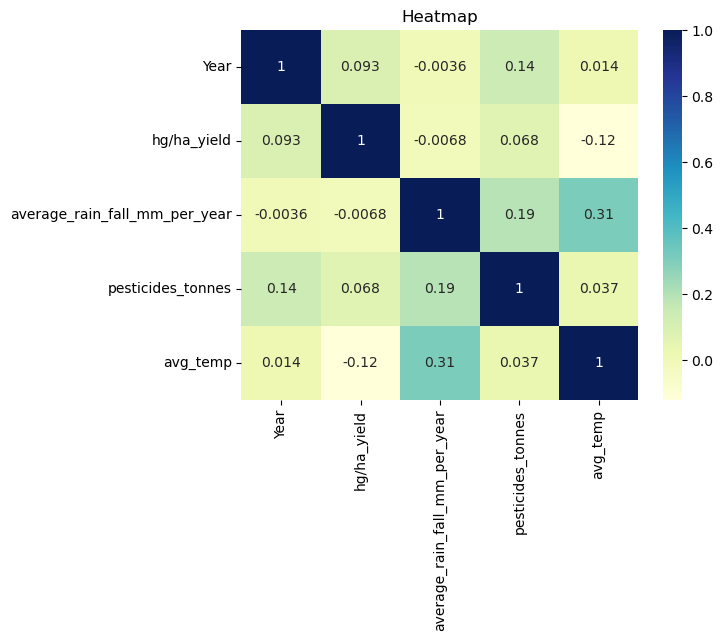

In [26]:
num_cor = Yield_final_data.select_dtypes(['int64','float64']).corr()
sns.heatmap(num_cor,cmap = 'YlGnBu',annot = True)
plt.title('Heatmap')

<Axes: xlabel='Year', ylabel='Count'>

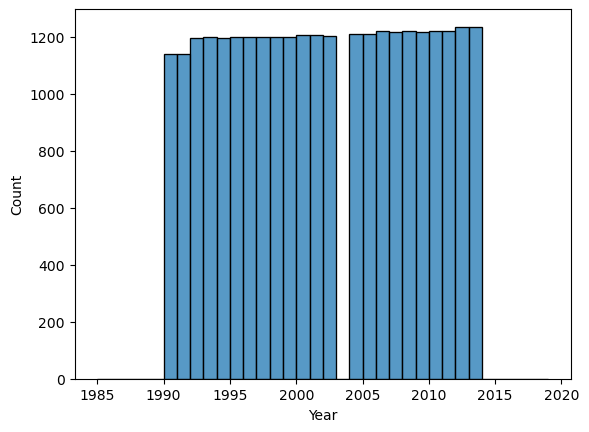

In [27]:
#This shows there is no deep correlation with those columns

## Checking the data distribution in the Year column
sns.histplot(Yield_final_data, x = 'Year' , bins = range(1985, 2020))

<Axes: xlabel='hg/ha_yield', ylabel='Count'>

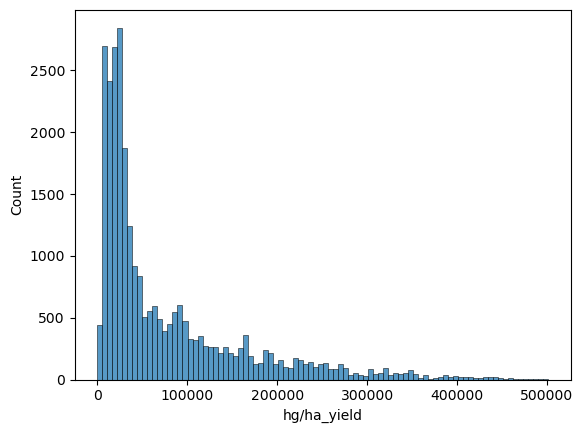

In [28]:
# Checking the data distribution in the yield column
sns.histplot(Yield_final_data, x = 'hg/ha_yield' )

<Axes: xlabel='pesticides_tonnes', ylabel='Count'>

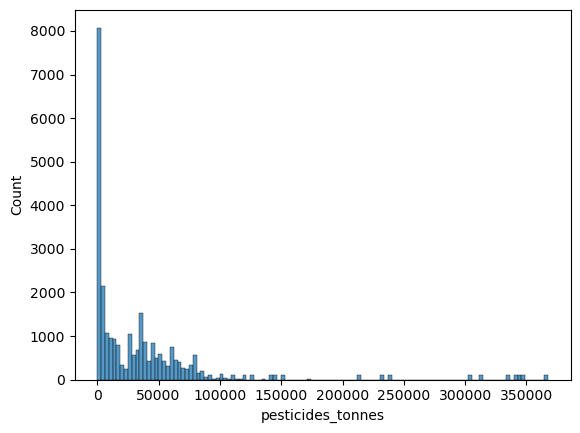

In [29]:
## Checking the data distribution in the pesticides column
sns.histplot(Yield_final_data, x = 'pesticides_tonnes' )

<Axes: xlabel='pesticides_tonnes', ylabel='Count'>

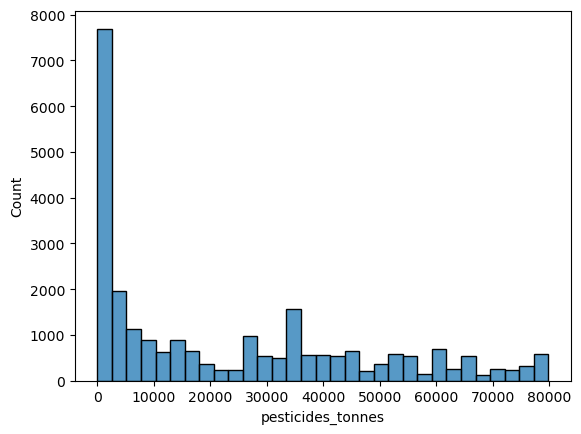

In [30]:
#There are outlier points in the datsets and hence dropping only the upper 10% data points to prevent high variance.

Yield_final_data = Yield_final_data[Yield_final_data['pesticides_tonnes'] <= Yield_final_data['pesticides_tonnes'].quantile(0.90)]
sns.histplot(Yield_final_data, x = 'pesticides_tonnes' )

<Axes: xlabel='hg/ha_yield', ylabel='Count'>

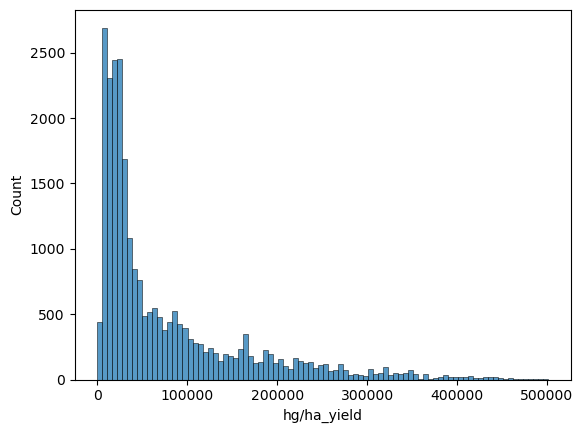

In [31]:
# Checking the data distribution in the yield column for changes
sns.histplot(Yield_final_data, x = 'hg/ha_yield' )

<Axes: xlabel='hg/ha_yield', ylabel='Count'>

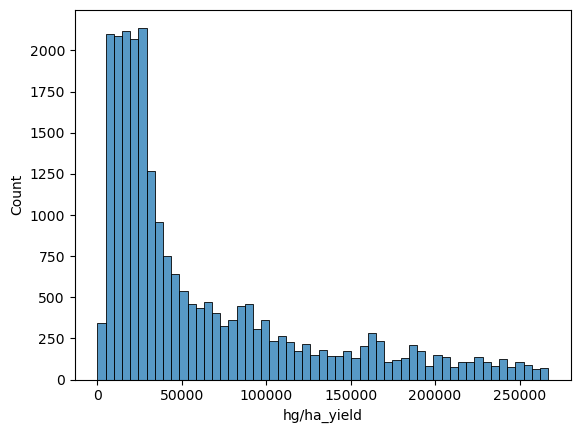

In [32]:
### There doesnt seem to be much change hence dropping the upper 5th quantile

Yield_final_data = Yield_final_data[Yield_final_data['hg/ha_yield'] <= Yield_final_data['hg/ha_yield'].quantile(0.95)]
sns.histplot(Yield_final_data, x = 'hg/ha_yield' )

<Axes: xlabel='pesticides_tonnes', ylabel='Count'>

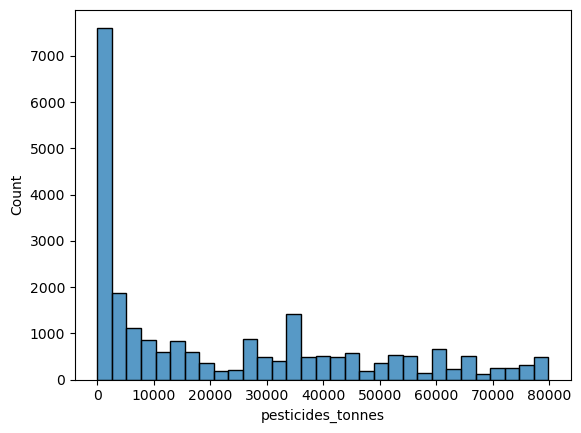

In [33]:
sns.histplot(Yield_final_data, x = 'pesticides_tonnes' )

Text(0.5, 1.0, 'Heatmap')

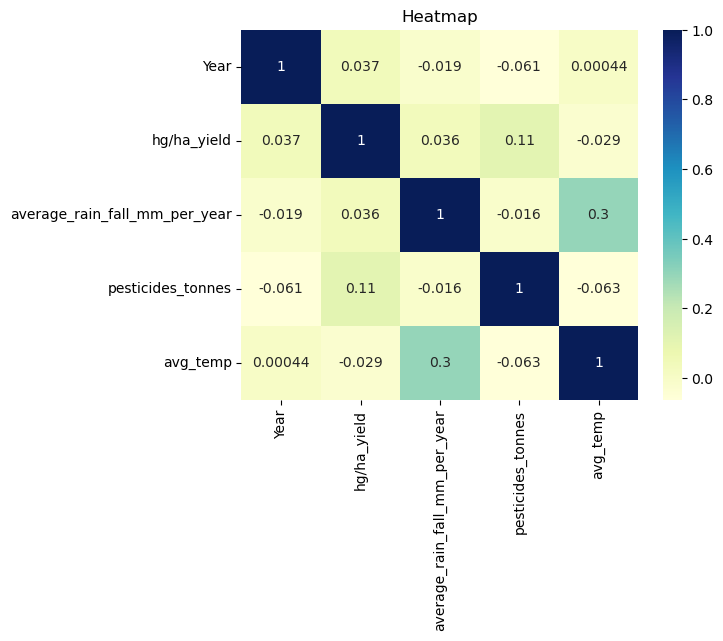

In [34]:
num_cor = Yield_final_data.select_dtypes(['int64','float64']).corr()
sns.heatmap(num_cor,cmap = 'YlGnBu',annot = True)
plt.title('Heatmap')

In [35]:
#convert all string data to indicator values
Yield_final_data = pd.get_dummies(Yield_final_data,columns = ['Item','Area'], drop_first = True)

In [36]:
Yield_final_data.head()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Item_Maize,Item_Potatoes,Item_Rice,Item_Sorghum,Item_Soybeans,...,Area_Tajikistan,Area_Thailand,Area_Tunisia,Area_Turkey,Area_Uganda,Area_Ukraine,Area_United Kingdom,Area_Uruguay,Area_Zambia,Area_Zimbabwe
0,1990,36613,1485.0,121.0,16.37,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1990,66667,1485.0,121.0,16.37,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1990,23333,1485.0,121.0,16.37,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1990,12500,1485.0,121.0,16.37,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1990,7000,1485.0,121.0,16.37,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [37]:
#split data for testing and training
from sklearn.model_selection import train_test_split

split_ratio = 0.2

X = Yield_final_data.drop(['Year', 'hg/ha_yield'], axis=1)
y = Yield_final_data['hg/ha_yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio,random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(19239, 111)
(19239,)
(4810, 111)
(4810,)


In [38]:
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

mmc = MinMaxScaler()
#fit X_train on a scale between 0 and 1
X_train = mmc.fit_transform(X_train)
#fit X_test on same scale
X_test = mmc.transform(X_test)

In [39]:
### training the model with LR
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

Model_perf = pd.DataFrame(columns=['Model_Name','MSE','R2_Score'])

LR_mse = mean_squared_error(y_test,y_pred)
LR_R2 = r2_score(y_test,y_pred)

new_row = {'Model_Name':'Linear Regression','MSE':LR_mse , 'R2_Score': LR_R2}
Model_perf.loc[len(Model_perf)] = new_row


In [40]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)  
X_poly = poly_features.fit_transform(X_train)

# Train the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly, y_train)

# Predict using the trained model

X_test_poly = poly_features.transform(X_test)
y_pred = poly_regression.predict(X_test_poly)
print("Predicted values:", y_pred)


Predicted values: [ 37191.4921875  40449.2421875 138327.2421875 ...  97659.6796875
  29962.2421875  19066.4921875]


In [41]:
PR_mse = mean_squared_error(y_test,y_pred) 
PR_R2 = r2_score(y_test,y_pred)

new_row = {'Model_Name':'Polynomial Regression(degree 2)','MSE':PR_mse , 'R2_Score': PR_R2}
Model_perf.loc[len(Model_perf)] = new_row

In [42]:
### Trying the XGB regressor now

from xgboost import XGBRegressor
XG_boost = XGBRegressor(max_depth = 3,n_estimators = 300 )

XG_boost.fit(X_train , y_train)
y_pred = XG_boost.predict(X_test)
XG_rmse = mean_squared_error(y_test,y_pred)
XG_R2 = r2_score(y_test,y_pred)

new_row = {'Model_Name':'XGB','MSE':XG_rmse ,'R2_Score': XG_R2}
Model_perf.loc[len(Model_perf)] = new_row

In [43]:
Model_perf

,Model_Name,MSE,R2_Score
0,Linear Regression,9.687942e+08,0.755712
1,Polynomial Regression(degree 2),2.156289e+08,0.945628
2,XGB,3.081767e+08,0.922291


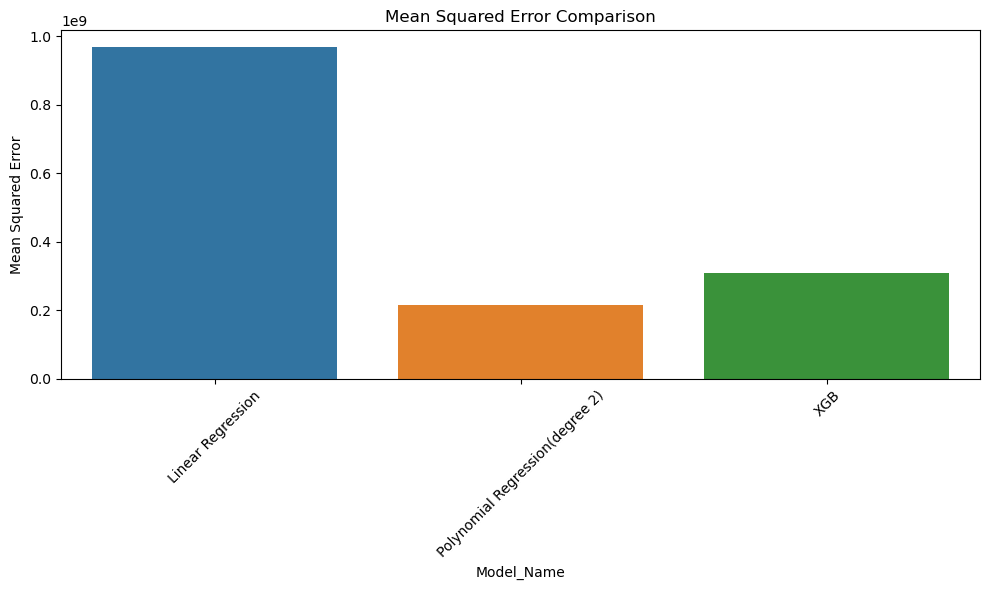

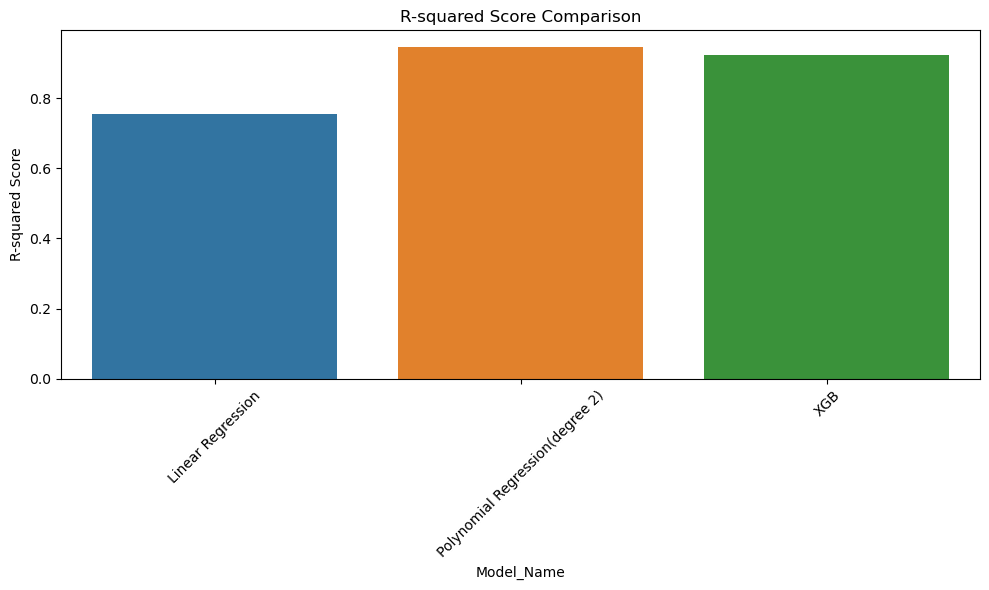

In [44]:
# Visualize Model Performance
plt.figure(figsize=(10, 6))

# Plot MSE
sns.barplot(x='Model_Name', y='MSE', data=Model_perf)
plt.title('Mean Squared Error Comparison')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot R-squared Score
plt.figure(figsize=(10, 6))
sns.barplot(x='Model_Name', y='R2_Score', data=Model_perf)
plt.title('R-squared Score Comparison')
plt.ylabel('R-squared Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()